In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pyPI as pi
import cv2

In [8]:
'''
Use this notation if you want to use circles instead lines
diameter = 7e-8  # Diámetro del glóbulo rojo en metros
# Diámetro en píxeles
diameter_pixels = max(5, min(int(diameter / lambda_ * x_size), min(x_size, y_size) // 2))

# Definir posiciones fijas para los glóbulos rojos (en píxeles)
fixed_positions = [(100, 400), (500, 100), (800, 250)]  # (x, y) en píxeles

# Definir intensidades específicas para cada glóbulo rojo en sample_image
intensity_values = [100, 180, 230]  # Valores entre 0 y 255
'''

'''
fixed_positions = [100, 250, 400]  # Posiciones en el eje y

# Definir matrices específicas para cada línea en sample
line_matrices = [
    pi.jones_matrix(np.pi, np.pi/2),        # Línea 1
    pi.jones_matrix(np.pi/3, 0),      # Línea 2
    pi.jones_matrix(np.pi/3, np.pi/2)       # Línea 3
]
'''

'\nfixed_positions = [100, 250, 400]  # Posiciones en el eje y\n\n# Definir matrices específicas para cada línea en sample\nline_matrices = [\n    pi.jones_matrix(np.pi, np.pi/2),        # Línea 1\n    pi.jones_matrix(np.pi/3, 0),      # Línea 2\n    pi.jones_matrix(np.pi/3, np.pi/2)       # Línea 3\n]\n'

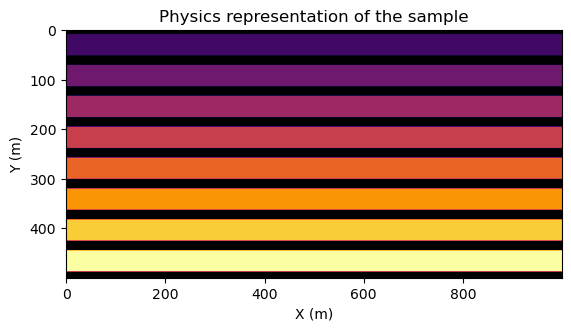

In [9]:
# Initialize the environment and extract relevant variables
sample, sample_image, X, Y = pi.initialize_environment()

# Parameters for line orientations (angles in radians)
# Common angular values are chosen for better visual reference
angles = [0, np.pi/8, np.pi/6, np.pi/4, np.pi/3, np.pi/2, np.pi, 2 * np.pi]

# Define fixed positions for horizontal lines (in pixels)
# These positions are spaced evenly across the image
fixed_positions = np.arange(10, 500, 500 // len(angles))  

# Generate Jones matrices for each corresponding angle
line_matrices = [pi.jones_matrix(np.pi, angle) for angle in angles]

# Add lines to the sample with defined thickness
# The thickness is adjusted proportionally to the number of angles
sample = pi.add_lines(fixed_positions, line_matrices, sample_image, sample, grosor=350 // len(angles))


In [10]:
E_in = pi.polarization_basis_set('P45')

In [11]:
alpha_HWP_IS, alpha_QWP_IS = pi.PSG_calculator(E_in, pi.polarization_basis_set('H'), p = True)
Eis = pi.field_notation(pi.PSG(alpha_HWP_IS, alpha_QWP_IS) @ E_in, p = True)
print(Eis)

HWP: alpha_1 = 0.1250π
QWP: alpha_2 = 0.0000π
1.0
0.0
0.0π

[[1.+0.j]
 [0.+0.j]]


In [12]:
alpha_HWP_R, alpha_QWP_R = pi.PSG_calculator(E_in, pi.polarization_basis_set('H'), p = True)
Er = pi.field_notation(pi.PSG(alpha_HWP_R, alpha_QWP_R) @ E_in, p = True)
print(Er)

HWP: alpha_1 = 0.1250π
QWP: alpha_2 = 0.0000π
1.0
0.0
0.0π

[[1.+0.j]
 [0.+0.j]]


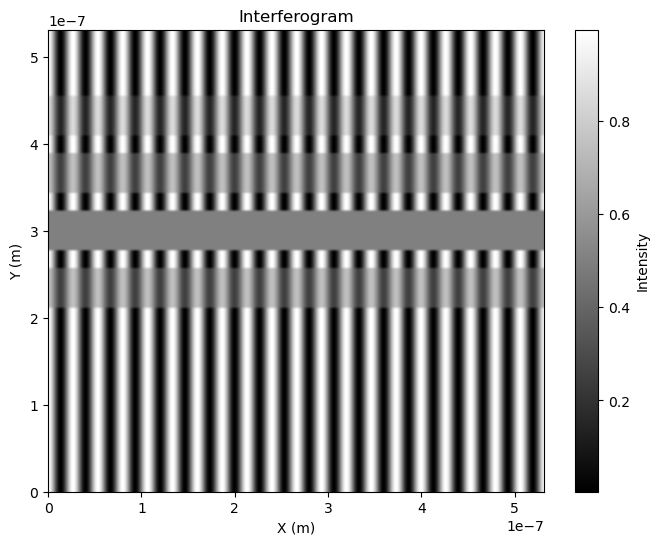

In [13]:
I, info,E_r, E_s = pi.sample_intensity(Er, Eis, sample, X, Y)

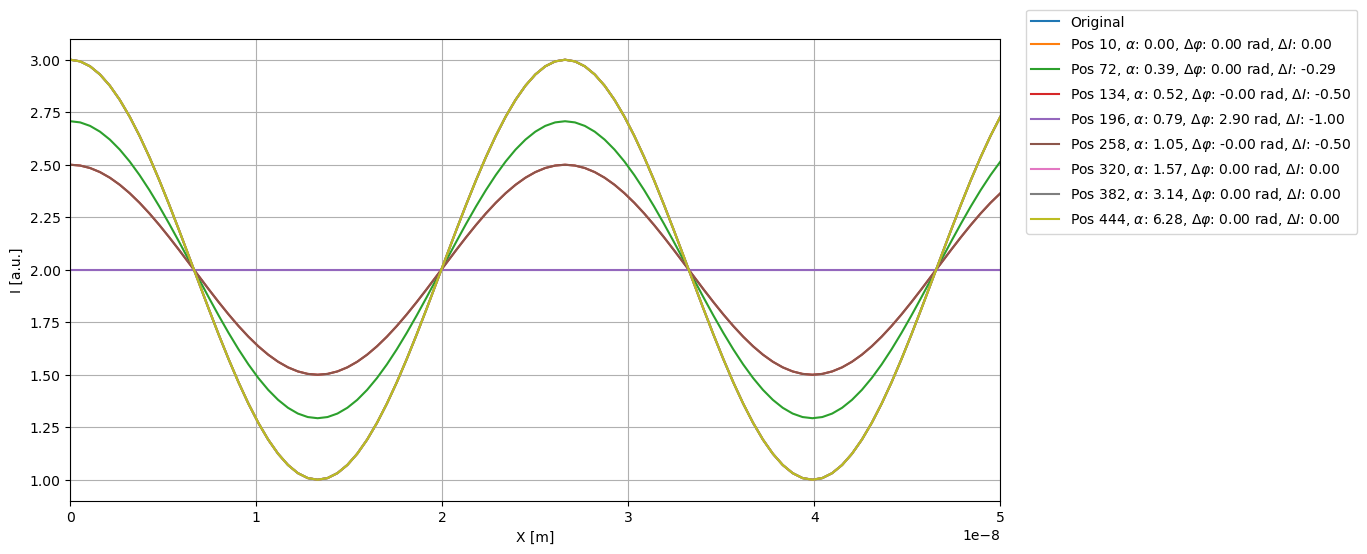

In [14]:
# Aumentar el tamaño de la figura para mejor visualización
plt.figure(figsize=(12, 6))

# Arreglos para almacenar desfases y cambios en la intensidad
desfases = []
cambios_intensidad = []

# Graficar la curva original
plt.plot(X[0], I[0], label="Original")

# Calcular el desfase y el cambio en la intensidad
for i, pos in enumerate(fixed_positions):
    # Cálculo del desfase con la nueva función
    desfase = pi.calculate_phase_shift(I[0], I[pos], X[0])
    
    # Cálculo del cambio en la intensidad
    cambio_intensidad = np.max(I[pos]) - np.max(I[0])
    
    # Guardar en los arreglos
    desfases.append(desfase)
    cambios_intensidad.append(cambio_intensidad)
    
    # Graficar cada curva con la leyenda correspondiente
    plt.plot(X[0], I[pos], label=rf"Pos {pos}, $\alpha$: {angles[i % len(angles)]:.2f}, $\Delta\varphi$: {desfase:.2f} rad, $\Delta I$: {cambio_intensidad:.2f}")


plt.xlabel('X [m]')
plt.ylabel('I [a.u.]')
plt.xlim(0, 0.5e-7)

# Colocar la leyenda fuera del gráfico (a la derecha)
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.82))

plt.grid(True)
plt.show()

In [15]:
b = info[0]
m = info[1]
vartheta = info[2]


In [16]:
vartheta[320,0] == vartheta[0,0]

True

In [17]:
from scipy.ndimage import gaussian_filter1d  # Para suavizar la curva

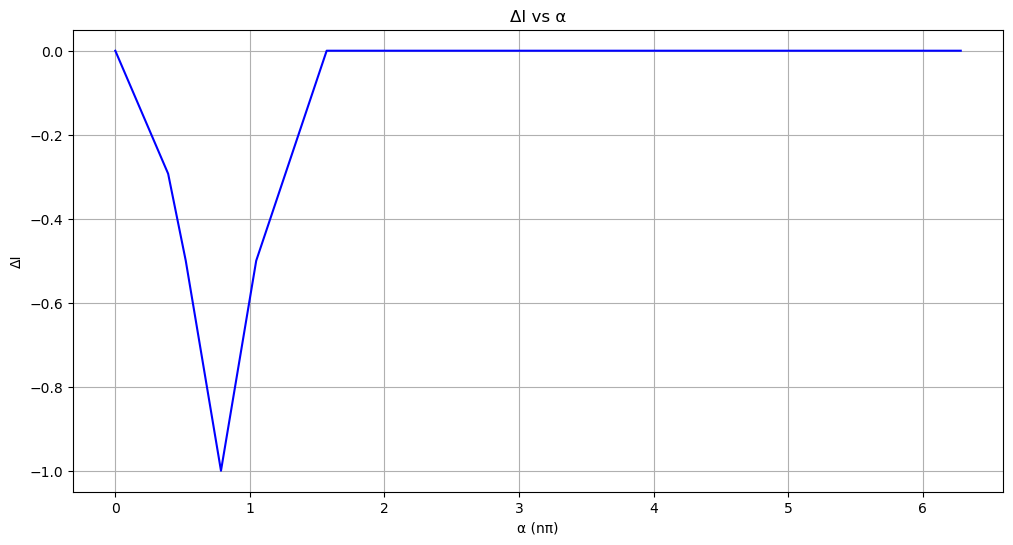

In [18]:
# Suavizar la curva usando una función Gaussiana
cambios_intensidad_suave = gaussian_filter1d(cambios_intensidad, sigma=0.01)

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(angles , cambios_intensidad_suave, label='ΔI (suavizado)', color='b')
plt.xlabel('α (nπ)')
plt.ylabel('ΔI')
plt.grid(True)
plt.title("ΔI vs α")
plt.show()

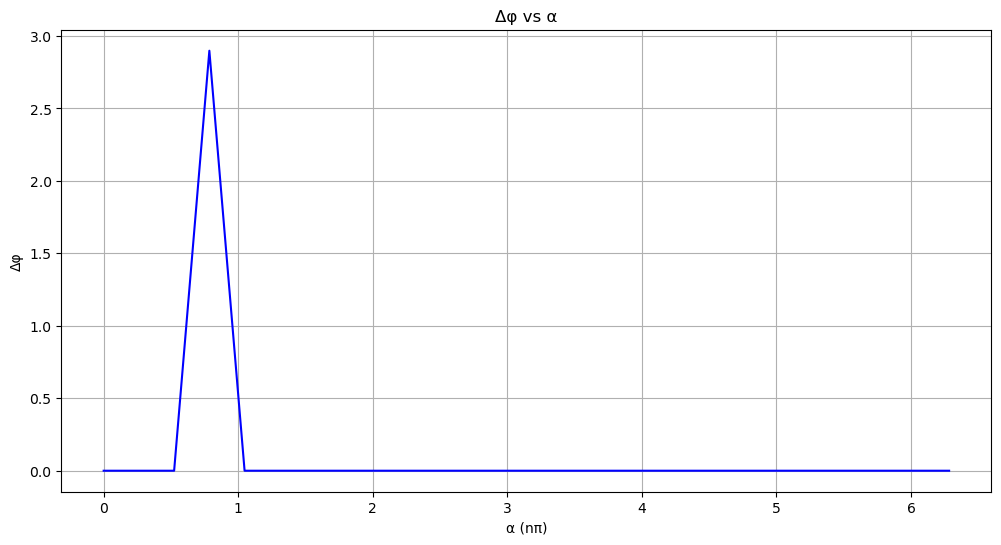

In [19]:
# Suavizar la curva usando una función Gaussiana
desfases_suavizado = gaussian_filter1d(desfases, sigma=0.01)

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(angles , desfases_suavizado, label='Δφ (suavizado)', color='b')
plt.xlabel('α (nπ)')
plt.ylabel('Δφ')
plt.grid(True)
plt.title("Δφ vs α")
plt.show()